# Bikeshare deman prediction 
### 1.1 Introduction
In this machine learning project, the demand for the bikes would be predicted using different machine learning techniques. There are different bike rental companies such as Zagster and City Bikes and there would be a great business value for the companies if they were to predict the demand for bikes for particular instances of time and other features such as temperature and windspeed. Therefore, it would be important to understand the demand for bikes during different instances of time so that companies use this information and make profits and also provide bikes to different people as and when needed respectively. As a result, there would be a good growth in revenue for different bike lending companies with the aid of machine learning and data science. 

In the project, we would be working with the Washington bike demand dataset and understand some of the features present in them. Later, we would add a few additional features so that we get get a good estimate of different parameters that need to be taken into consideration when implementing visualization and different machine learning and deep learning algorithms. Finally, we would plot the graphs of the predictions and the actual values to get an understanding of how well our model performed, not just on the training data but the test data respectively.

### 1.2 Metrics 


### 1.3 Source 

### Table of Contents 
### 1. Washington Bike Demand Prediction

### 2. Exploratory Data Analysis 

### 3. Machine Learning Analysis
&ensp; 3.1 Deep Neural Network

&ensp; 3.2 K Nearest Neighbors 

&ensp; 3.3 PLS Regression 

&ensp; 3.4 Decision Tree Regressor

&ensp; 3.5 Gradient Boosting Regressor 

&ensp; 3.6 Logistic Regression

### 4. Conclusion
___________________________________________________________________________________________________

#### Importing Libraries






In [129]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [130]:
#!pip install seaborn
#!pip install --upgrade pip

In [329]:
df = pd.read_csv('bike-sharing-demand/train.csv')

In [330]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [133]:
df.shape

(10886, 12)

In [134]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [136]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [137]:
# We are trying to access the days in the date column as can be seen below. We would store it in day column 
df['day']= df['datetime'].apply(lambda x: x[8:10])
df['month']= df['datetime'].apply(lambda x: int(x[5:7]))
df['hour']= df['datetime'].apply(lambda x: int(x[11:13]))

In [138]:
df['hour']

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: hour, Length: 10886, dtype: int64

In [139]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19'], dtype=object)

In [140]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,1,4


In [141]:
print("The different unique numerical values present in Season feature are: {}".format(df['season'].unique()))

The different unique numerical values present in Season feature are: [1 2 3 4]


In [142]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [143]:
season_dict

{1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [144]:
df['Season_cat'] = df['season'].map(season_dict)

In [145]:
df['Season_cat']

0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
10881    Winter
10882    Winter
10883    Winter
10884    Winter
10885    Winter
Name: Season_cat, Length: 10886, dtype: object

In [146]:
df['Season_cat'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

# 2.1 Different Season Plots 

In this section, we are going to be visualizing the bike demand for different seasons. We are also going to take into account the total data points for different seasons and count them to get a broader understanding. Getting a good understanding of the demand for bikes in different seasons can be important as this feature is quite related to the demand for different bikes. This could also be observed in real-life where we see a lot of people driving bikes during one or more seasons compared to the other. Therefore, taking this feature into consideration would give us a good understanding of the importance of this feature and how influential it would be for our machine learning predictions respectively. 

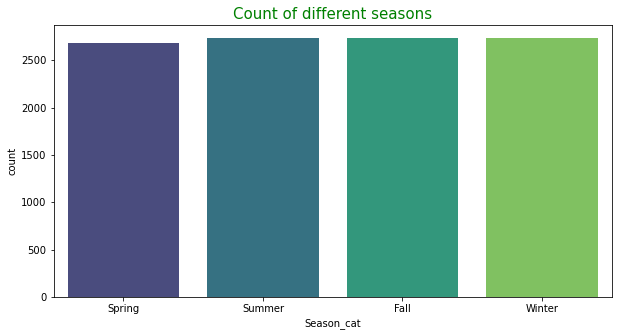

In [148]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'Season_cat', palette = 'viridis', saturation = 0.75)
plt.title("Count of different seasons", color = 'green', fontsize = 15)
plt.show()

In [149]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,Season_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,1,0,Spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,1,1,Spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,1,2,Spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,1,3,Spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,1,4,Spring


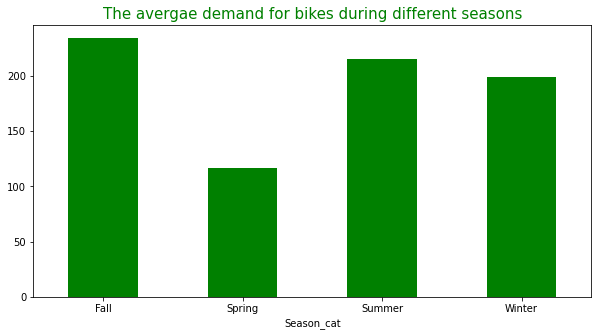

In [150]:
plt.figure(figsize = (10, 5))
df.groupby(['Season_cat']).mean()['count'].plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 0)
plt.title("The avergae demand for bikes during different seasons", fontsize = 15, color = 'green')
plt.show()

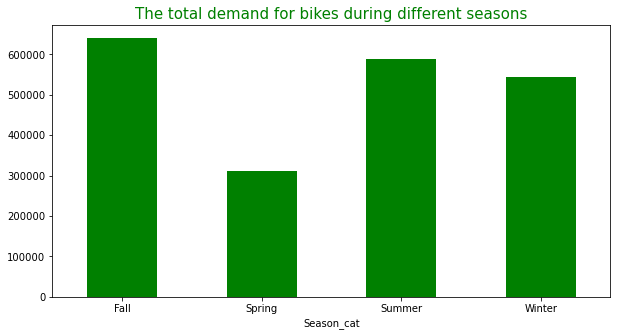

In [151]:
plt.figure(figsize = (10, 5))
df.groupby(['Season_cat']).sum()['count'].plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 0)
plt.title("The total demand for bikes during different seasons", fontsize = 15, color = 'green')
plt.show()

In [152]:
month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July",
             8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
df["Month_cat"] = df['month'].map(month_dict)

In [153]:
df["Month_cat"]

0         January
1         January
2         January
3         January
4         January
           ...   
10881    December
10882    December
10883    December
10884    December
10885    December
Name: Month_cat, Length: 10886, dtype: object

# 2.2 Different Month Plots

Now it is time to increase the granularity and understand how different months influence the demand for bikes. In general, we see that when there is snow in cities or rainfall, we don't generally expect a lot of bikes let alone bikes from lending companies. Hence, considering the different months at which there is demand for bikes would also give us a good understanding of the importance of this feature in our machine learning analysis respectively. 

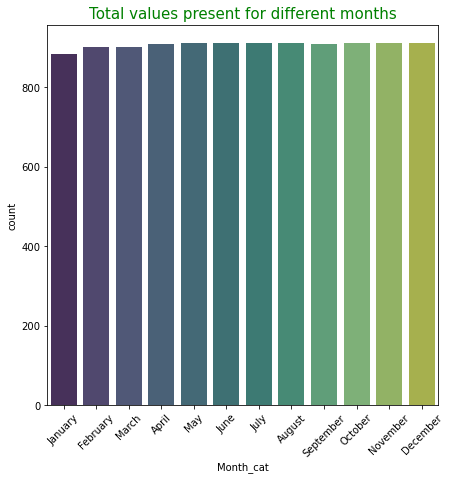

In [154]:
plt.figure(figsize = (7, 7))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'Month_cat', palette = 'viridis', saturation = 0.5) 
plt.title("Total values present for different months", fontsize = 15, color = 'green')
plt.show()


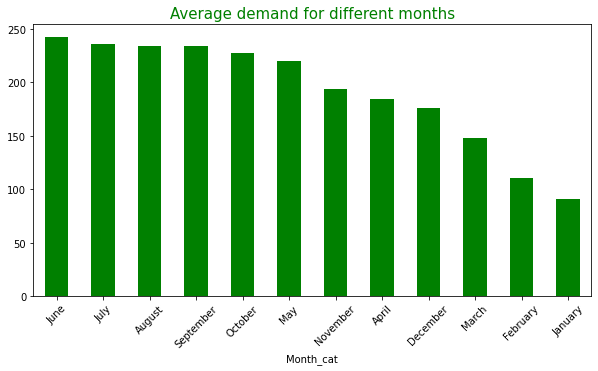

In [155]:
plt.figure(figsize = (10, 5))
df.groupby(['Month_cat']).mean()['count'].sort_values(ascending = False).plot(kind = 'bar', color = 'green')
plt.xticks(rotation = 45)
plt.title("Average demand for different months", fontsize = 15, color = 'green')
plt.show()

## 2.3 Distribution of Windspeed 

Taking a look at the distribution of the values, we see that most of the values that we are working with in terms of windspeed are with lower speeds. There are quite a few extreme values that are present. Therefore, most of the values that we are dealing in the dataset have values of windspeed that are not quite high respectively.

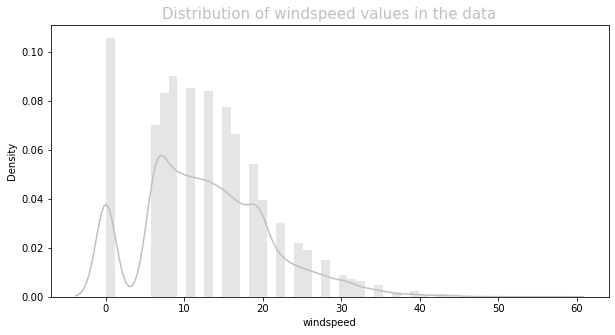

In [156]:
plt.figure(figsize = (10, 5))
sns.distplot(df['windspeed'], color = 'silver')
plt.title("Distribution of windspeed values in the data", fontsize = 15, color = 'silver')
plt.show()

## 2.4 Distribution of Temperature Values 

As can be seen, the temperature values are quite evenly distributed. Therefore, we are working with the temperature values that are quite evenly distributed. This would ensure that we get the demand for different temperature values respectively. 

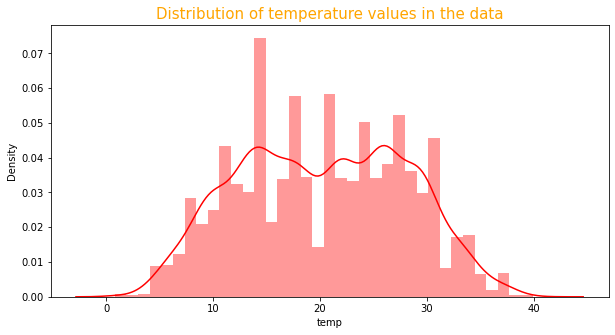

In [157]:
plt.figure(figsize = (10, 5))
sns.distplot(df['temp'], color = 'red')
plt.title("Distribution of temperature values in the data", fontsize = 15, color = 'orange')
plt.show()

In [158]:

def temperature_converter(value):
    temp_max = df['temp'].max()
    temp_min = df['temp'].min()
    return (value * (temp_max - temp_min) + temp_min)

In [159]:
df['Temperature_converted'] = df['temp'].apply(temperature_converter)

In [160]:
df['Temperature_converted']

0        396.1912
1        363.2436
2        363.2436
3        396.1912
4        396.1912
           ...   
10881    626.8244
10882    593.8768
10883    560.9292
10884    560.9292
10885    527.9816
Name: Temperature_converted, Length: 10886, dtype: float64

## 2.5 Total Demand for Bikes during Different Hours

We see that the the total demand for bikes is highest at 5 pm Washington time. As can be seen, there is quite a low demand for bikes early in the morning starting from 1 am to 7 am respectively. In addition to this, we can also see that there is a high demand for bikes starting from 8 am and the demand keeps increasing respectively. 

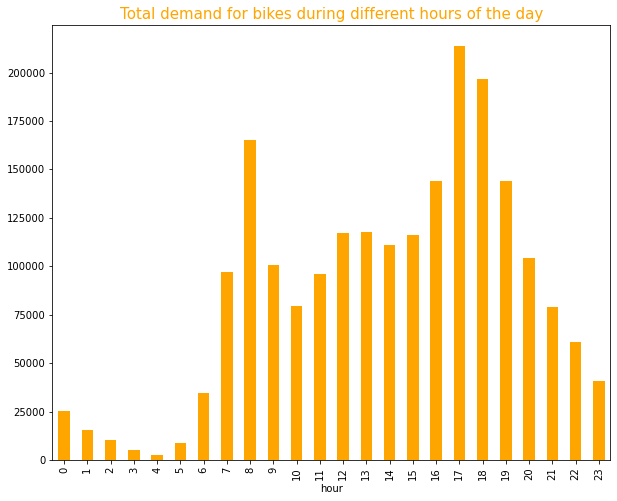

In [161]:
plt.figure(figsize = (10, 8))
df.groupby(['hour'])['count'].sum().plot(kind = 'bar', color = 'orange')
plt.title("Total demand for bikes during different hours of the day", fontsize = 15, color = 'orange')
plt.show()

## 2.6 Distribution of Humidity values 

We can see that there is a good distribution of humidity values present and they are quite evenly distributed respectively. There is quite a bit of a left shift in the data. 

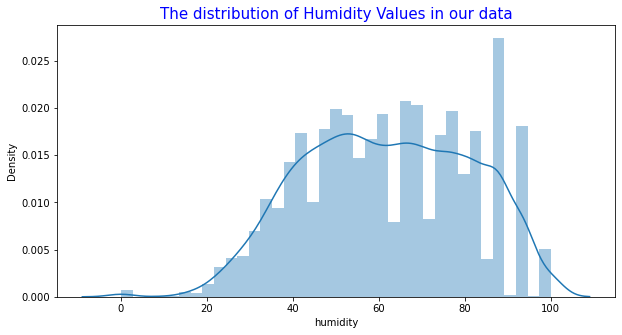

In [162]:
plt.figure(figsize = (10, 5))
sns.distplot(df['humidity'])
plt.title("The distribution of Humidity Values in our data", fontsize = 15, color = 'blue')
plt.show()

# 2.7 Scatterplots

Using scatterplots when doing the exploratory data analysis would give us a good understanding of the dependency of different features that we are considering when plotting the graphs. A scatterplot gives a plot based on different data points that takes into account 2 features. If we see that there is a linearity in the data and the points that are marked by the scatterplot, it could be concluded that those features are dependent on each other or strongly correlated. On the other hand, if there is a negative spread of the data points when plotted on the scatterplot, this would mean that there is a negative correlation or inverse dependency. 

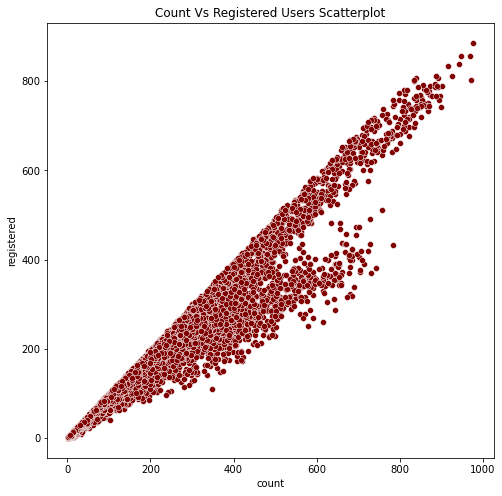

In [165]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'count', y = 'registered', data = df, color = 'maroon', marker = 'o')
plt.title('Count Vs Registered Users Scatterplot')
plt.show()

In [166]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,Season_cat,Month_cat,Temperature_converted
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,1,0,Spring,January,396.1912
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,1,1,Spring,January,363.2436
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,1,2,Spring,January,363.2436
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,1,3,Spring,January,396.1912
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,1,4,Spring,January,396.1912


<AxesSubplot:xlabel='casual', ylabel='Density'>

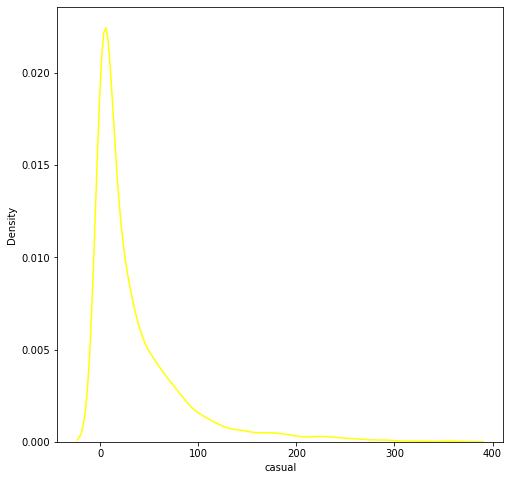

In [167]:
plt.figure(figsize = (8, 8))
sns.kdeplot(df['casual'], color = 'yellow')

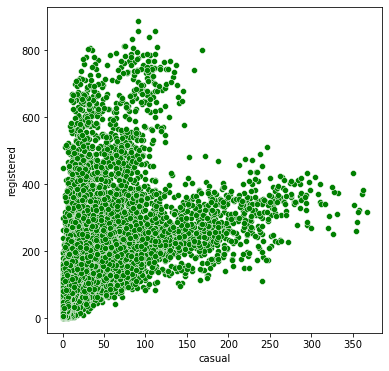

In [168]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'casual', y = 'registered', color = 'green', data = df)
plt.show()

In [169]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'month', 'hour', 'Season_cat', 'Month_cat',
       'Temperature_converted'],
      dtype='object')

In [170]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,Season_cat,Month_cat,Temperature_converted
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,1,0,Spring,January,396.1912
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,1,1,Spring,January,363.2436
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,1,2,Spring,January,363.2436
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,1,3,Spring,January,396.1912
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,1,4,Spring,January,396.1912


In [171]:
df['temp'].min()

0.82

In [177]:
def temperature_segments(value):
    if value < 5:
        return 2.5
    elif value < 15  and value > 5:
        return 10
    elif value < 25 and value > 15:
        return 20
    elif value < 35 and value > 25:
        return 30
    else:
        return 40

We would be working with the temperature segments and divide the temperature values respectively.

In [179]:
df['Temperature_segments'] = df['temp'].apply(temperature_segments)

## 2.8 Temperature Segments Countplot

There can be extremely high values or extremely low values of temperature in our data. As can be seen, looks like there are very few points that have a very high temperature or a very low temperature respectively. 

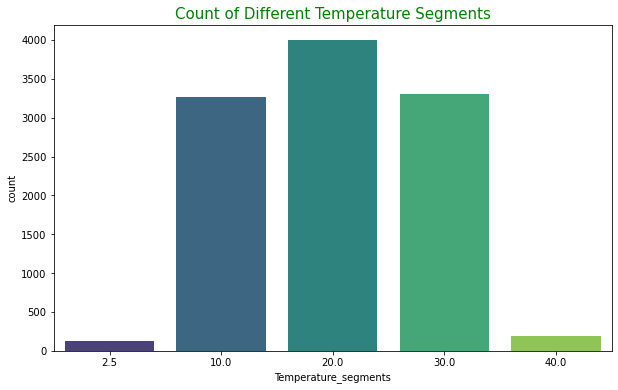

In [180]:
plt.figure(figsize = (10, 6))
sns.countplot(df['Temperature_segments'], palette = 'viridis')
plt.title("Count of Different Temperature Segments", fontsize = 15, color = 'green')
plt.show()

## 2.9 Average of Temperature Segments

It is now time to see how the demand for bikes is influenced by temperature. As can be seen from the plot below, there is a good average demand for bikes for the temperature segment 0.8 compared to the other segments that we have just created. This could give us a good inference that as the temperature values keep increasing, there is a possibility for the demand for the bikes to increase. However, there is a caveat here where if the temperature is too hot, then people would not be inclined to drive the bikes. Therefore, this gave us a good understanding of how temperature could be one of the deciding factors which could be used for predicting the bike demand. 

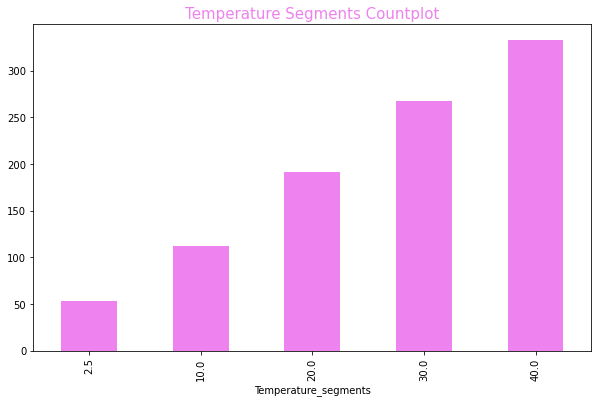

In [181]:
plt.figure(figsize = (10, 6))
df.groupby(['Temperature_segments']).mean()['count'].plot(kind = 'bar', color = 'violet')
plt.title("Temperature Segments Countplot", fontsize = 15, color = 'violet')
plt.show()

In [182]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,1,0,Spring,January,396.1912,10.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,1,1,Spring,January,363.2436,10.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,1,2,Spring,January,363.2436,10.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,1,3,Spring,January,396.1912,10.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,1,4,Spring,January,396.1912,10.0


## 2.9(a) Lineplot for Temperature for Different Months

We see from the figure below that the temperature on average is higher in the month of July and it is quite low in the month of February as it is the spring season during that time. As a result, we get different average temperatures for different months and we are going to be using this understanding and see how the demand for bikes would change based on the values respectively. 

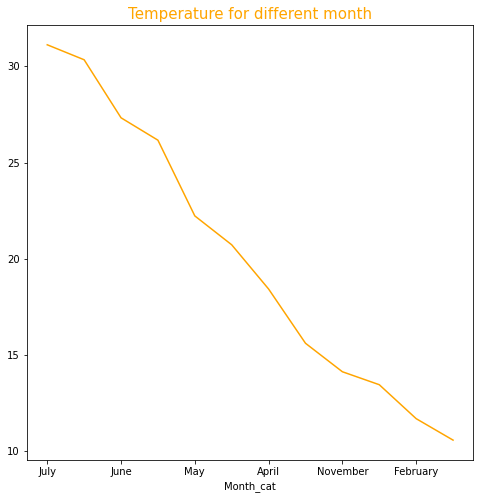

In [184]:
plt.figure(figsize = (8, 8))
df.groupby(['Month_cat']).mean()['Temperature_segments'].sort_values(ascending = False).plot(kind = 'line', color = 'orange')
plt.title("Temperature for different month", color = 'orange', fontsize = 15)
plt.show()

## 2.9(b) Scatterplot between Total Demand and Casual Drivers

As can be seen below, there is a linear relationship between the total number of casual drivers and the demand for the bikes respectively. There seems to a linear trend between the number of casual drivers and the total demand for the bikes. 

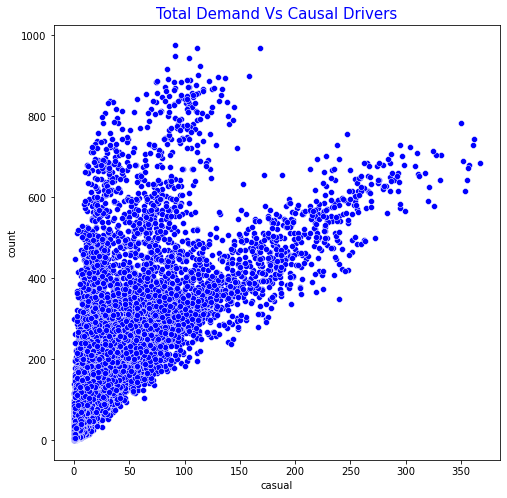

In [185]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'casual', y = 'count', data = df, color = 'blue')
plt.title("Total Demand Vs Causal Drivers", fontsize = 15, color = 'blue')
plt.show()

## 2.9(c) Average Demand for Bikes for Different Days of the Week

As can be seen below, there seems to be not much of a difference between different days of the week as the values of the average demand for bikes is almost the same with slight differences. We cannot easily distinguish the differences and therefore, this feature might not be that useful in helping us in predicting the total demand for bikes respectively.

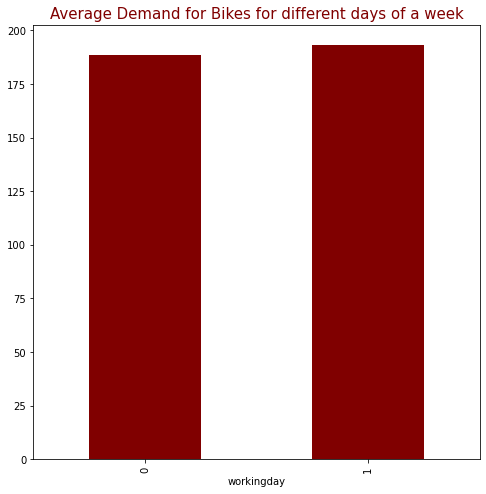

In [186]:
plt.figure(figsize = (8, 8))
df.groupby(['workingday']).mean()['count'].plot(kind = 'bar', color = 'maroon')
plt.title("Average Demand for Bikes for different days of a week", fontsize = 15, color  = 'maroon')
plt.show()

We are going to once again look at the data values along with their data types. 

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               10886 non-null  object 
 1   season                 10886 non-null  int64  
 2   holiday                10886 non-null  int64  
 3   workingday             10886 non-null  int64  
 4   weather                10886 non-null  int64  
 5   temp                   10886 non-null  float64
 6   atemp                  10886 non-null  float64
 7   humidity               10886 non-null  int64  
 8   windspeed              10886 non-null  float64
 9   casual                 10886 non-null  int64  
 10  registered             10886 non-null  int64  
 11  count                  10886 non-null  int64  
 12  day                    10886 non-null  object 
 13  month                  10886 non-null  int64  
 14  hour                   10886 non-null  int64  
 15  Se

In [188]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,1,0,Spring,January,396.1912,10.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,1,1,Spring,January,363.2436,10.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,1,2,Spring,January,363.2436,10.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,1,3,Spring,January,396.1912,10.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,1,4,Spring,January,396.1912,10.0


We are going to be dropping the season categorical variable and the month categorical variable as those variables are objects rather than integers or floats. Here, drop is being used to remove the columns with the names. 

In [189]:
df.drop(['Season_cat', 'Month_cat'], axis = 1, inplace = True)

In [190]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,Temperature_converted,Temperature_segments
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,01,1,0,396.1912,10.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01,1,1,363.2436,10.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,01,1,2,363.2436,10.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,01,1,3,396.1912,10.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,01,1,4,396.1912,10.0


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               10886 non-null  object 
 1   season                 10886 non-null  int64  
 2   holiday                10886 non-null  int64  
 3   workingday             10886 non-null  int64  
 4   weather                10886 non-null  int64  
 5   temp                   10886 non-null  float64
 6   atemp                  10886 non-null  float64
 7   humidity               10886 non-null  int64  
 8   windspeed              10886 non-null  float64
 9   casual                 10886 non-null  int64  
 10  registered             10886 non-null  int64  
 11  count                  10886 non-null  int64  
 12  day                    10886 non-null  object 
 13  month                  10886 non-null  int64  
 14  hour                   10886 non-null  int64  
 15  Te

In [192]:
df['day'] = df['day'].apply(lambda x: int(x))

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               10886 non-null  object 
 1   season                 10886 non-null  int64  
 2   holiday                10886 non-null  int64  
 3   workingday             10886 non-null  int64  
 4   weather                10886 non-null  int64  
 5   temp                   10886 non-null  float64
 6   atemp                  10886 non-null  float64
 7   humidity               10886 non-null  int64  
 8   windspeed              10886 non-null  float64
 9   casual                 10886 non-null  int64  
 10  registered             10886 non-null  int64  
 11  count                  10886 non-null  int64  
 12  day                    10886 non-null  int64  
 13  month                  10886 non-null  int64  
 14  hour                   10886 non-null  int64  
 15  Te

In [194]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour,Temperature_converted,Temperature_segments
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,396.1912,10.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,363.2436,10.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,363.2436,10.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,396.1912,10.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,396.1912,10.0


It is really important to remove the casual and registered users features from our data as these would surely give the output and the machine learning model would consider these as important features and ignore the remaining.

In [195]:
df.drop(['casual', 'registered'], axis = 1, inplace = True)

In [196]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,hour,Temperature_converted,Temperature_segments
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0,396.1912,10.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,363.2436,10.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2,363.2436,10.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3,396.1912,10.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4,396.1912,10.0


In [197]:
from datetime import datetime

In [198]:
df['dteday'] = df['datetime'].apply(lambda x: x[:10])

In [199]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,hour,Temperature_converted,Temperature_segments,dteday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0,396.1912,10.0,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,363.2436,10.0,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2,363.2436,10.0,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3,396.1912,10.0,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4,396.1912,10.0,2011-01-01


In [200]:
univariate_data_df = df['count']
univariate_data_df.index = df['dteday']
univariate_data_df.head()

dteday
2011-01-01    16
2011-01-01    40
2011-01-01    32
2011-01-01    13
2011-01-01     1
Name: count, dtype: int64

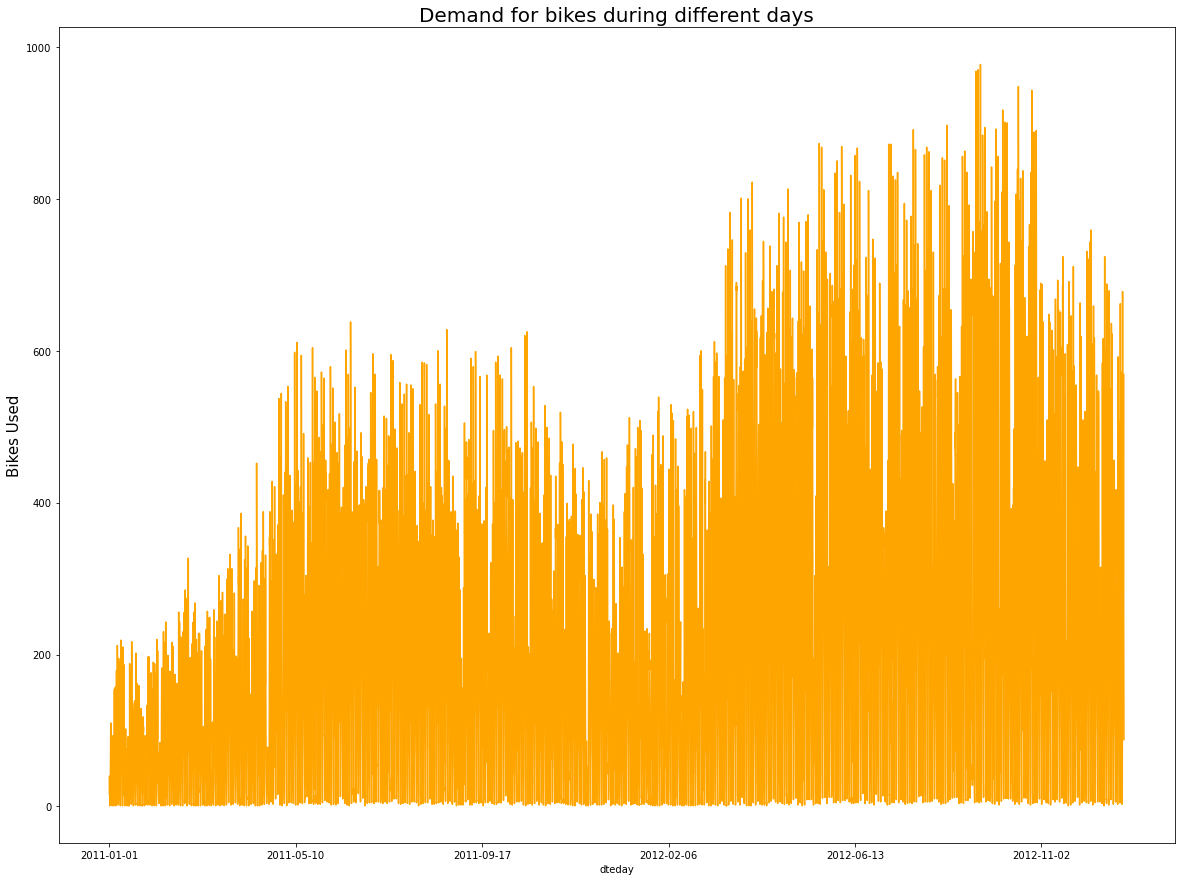

In [201]:
plt.figure(figsize = (20, 15))
univariate_data_df.plot(color = 'orange')
plt.title('Demand for bikes during different days', fontsize = 20)
plt.ylabel('Bikes Used', fontsize = 15)
plt.show()

In [202]:
univariate_data_df

dteday
2011-01-01     16
2011-01-01     40
2011-01-01     32
2011-01-01     13
2011-01-01      1
             ... 
2012-12-19    336
2012-12-19    241
2012-12-19    168
2012-12-19    129
2012-12-19     88
Name: count, Length: 10886, dtype: int64

In [203]:
univariate_data_df.head()

dteday
2011-01-01    16
2011-01-01    40
2011-01-01    32
2011-01-01    13
2011-01-01     1
Name: count, dtype: int64

In [204]:
univariate_data_df.values

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [205]:
univariate_data_df.shape

(10886,)

In [206]:
uni_data = univariate_data_df.values

In [207]:
uni_data

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [208]:
import tensorflow as tf

Normalizing the data

In [217]:
TRAIN_SPLIT = 8000

tf.random.set_seed(101)

uni_train_mean = uni_data[: TRAIN_SPLIT].mean()
uni_train_std = uni_data[: TRAIN_SPLIT].std()

In [218]:
uni_data = (uni_data - uni_train_mean) / uni_train_std

In [219]:
uni_data

array([-0.94368287, -0.79199623, -0.84255844, ...,  0.01699917,
       -0.22949161, -0.48862295])

Trying simple statistical averages to predict the trend for univariate data

In [250]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []
    
    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i + target_size])
    return np.array(data), np.array(labels)

Creating a batch of 24 values used for prediction

In [251]:
univariate_past_history = 24
univariate_future_target = 0

In [252]:
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT, univariate_past_history, univariate_future_target)

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None, univariate_past_history, univariate_future_target)

In [253]:
print(x_train_uni.shape)
print(y_train_uni.shape)
print(x_val_uni.shape)
print(y_val_uni.shape)

(7976, 24, 1)
(7976,)
(2862, 24, 1)
(2862,)


In [254]:
def create_time_steps(length):
    return (list(range(-length, 0)))

print(create_time_steps(20))

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [255]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'bx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    
    if delta: 
        future = delta
    else:
        future = 0
        
    plt.figure(figsize = (20, 10))    
    plt.title(title, fontsize = 20)

    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize = 10, label = labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])


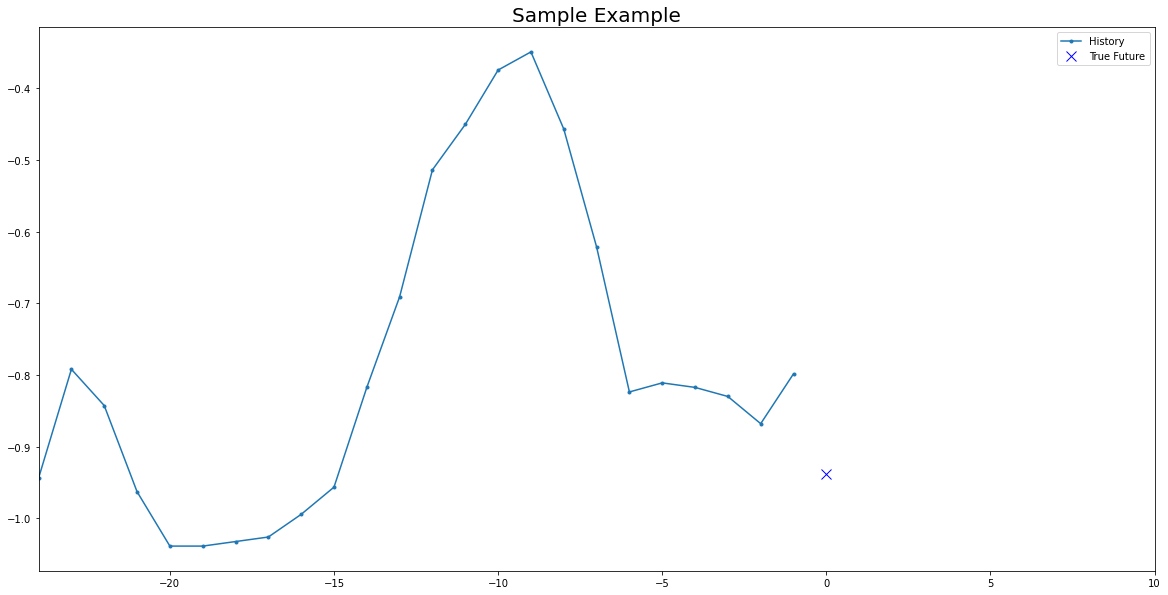

In [256]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [257]:
def mwa(history):
    return np.mean(history)

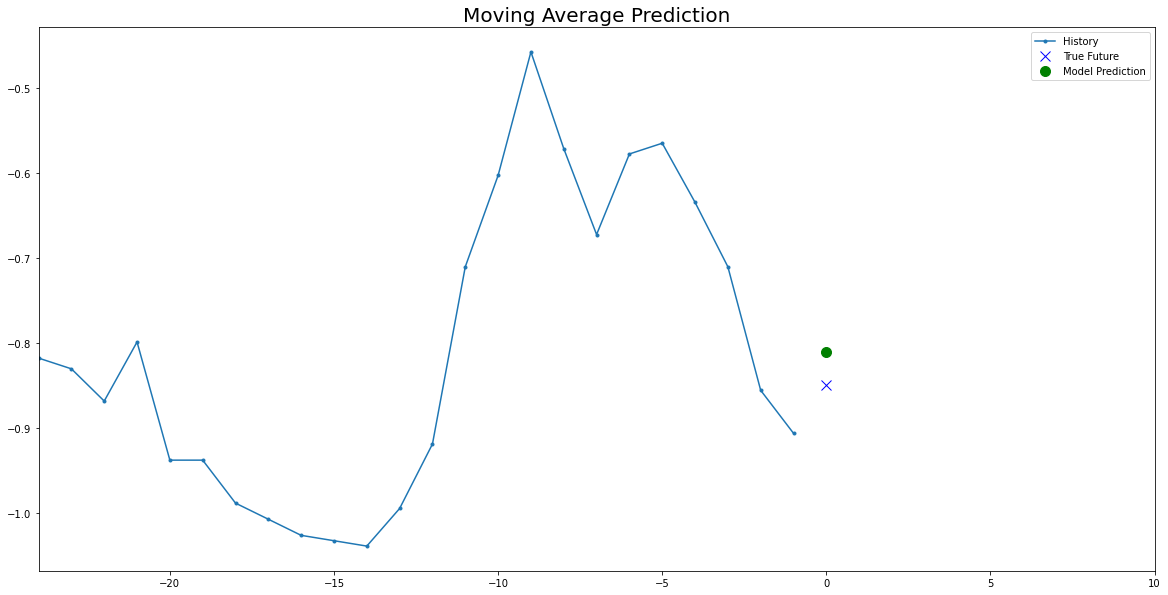

In [258]:
i = 20
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0, 'Moving Average Prediction')

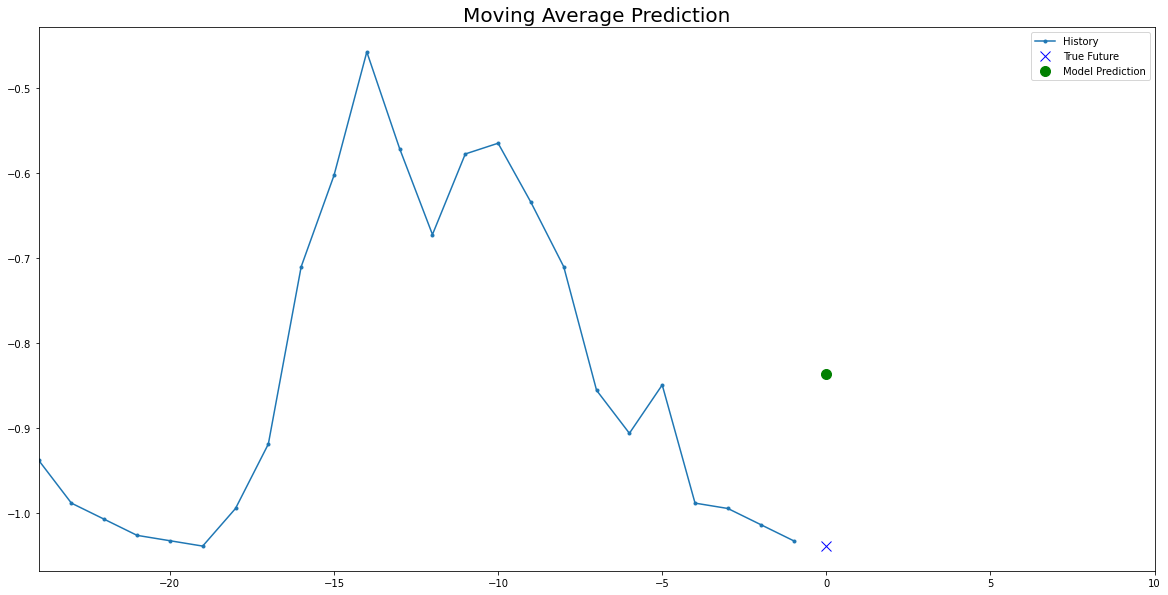

In [259]:
i = 25
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0, 'Moving Average Prediction')

In [260]:
BATCH_SIZE = 256
BUFFER_SIZE = 8000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [261]:
print(train_univariate)
print(val_univariate)

<RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


Trying a LSTM model for univariate data

In [262]:
simple_lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(32, input_shape = x_train_uni.shape[-2:]),
                                              tf.keras.layers.Dense(1)])

In [263]:
simple_lstm_model.compile(optimizer = 'adam', loss = 'mae')

In [264]:
STEPS_PER_EPOCH = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs = EPOCHS, steps_per_epoch = STEPS_PER_EPOCH, validation_data = val_univariate, 
                     validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 6s 23ms/step - loss: 0.4256 - val_loss: 0.4901
Epoch 2/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2852 - val_loss: 0.3793
Epoch 3/10
200/200 [==============================] - 4s 22ms/step - loss: 0.2443 - val_loss: 0.3405
Epoch 4/10
200/200 [==============================] - 4s 19ms/step - loss: 0.2296 - val_loss: 0.3199
Epoch 5/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2191 - val_loss: 0.3153
Epoch 6/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2112 - val_loss: 0.3116
Epoch 7/10
200/200 [==============================] - 4s 20ms/step - loss: 0.2001 - val_loss: 0.2791
Epoch 8/10
200/200 [==============================] - 5s 25ms/step - loss: 0.1880 - val_loss: 0.2675
Epoch 9/10
200/200 [==============================] - 4s 20ms/step - loss: 0.1795 - val_loss: 0.2559
Epoch 10/10
200/200 [==============================] - 4s 21ms/step - loss: 0.1739 - val_lo

8/8 [==============================] - 0s 4ms/step


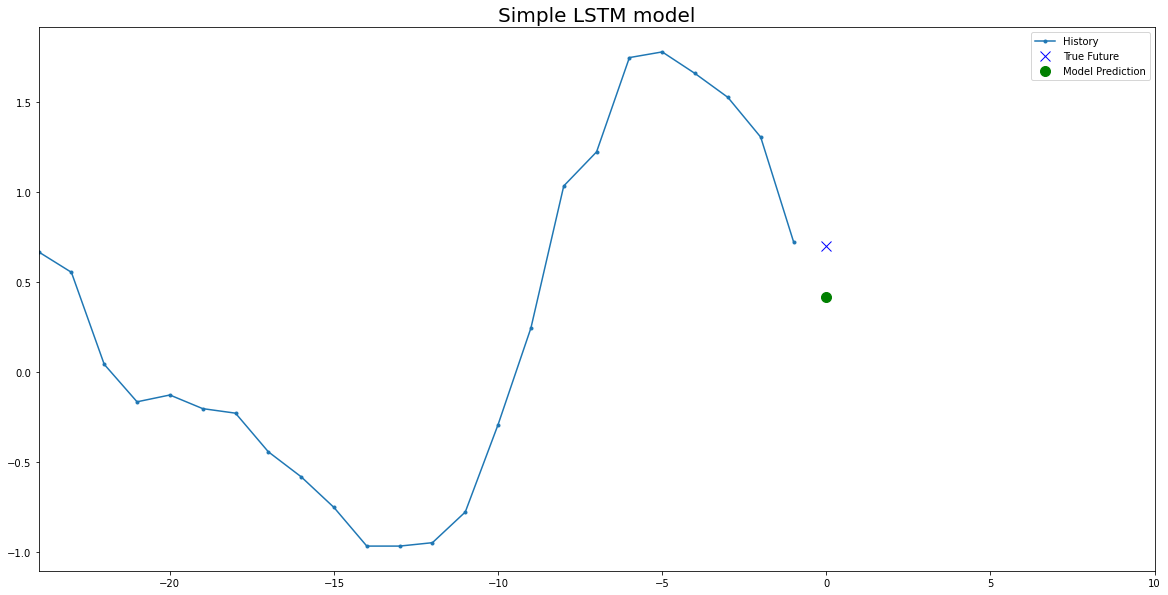

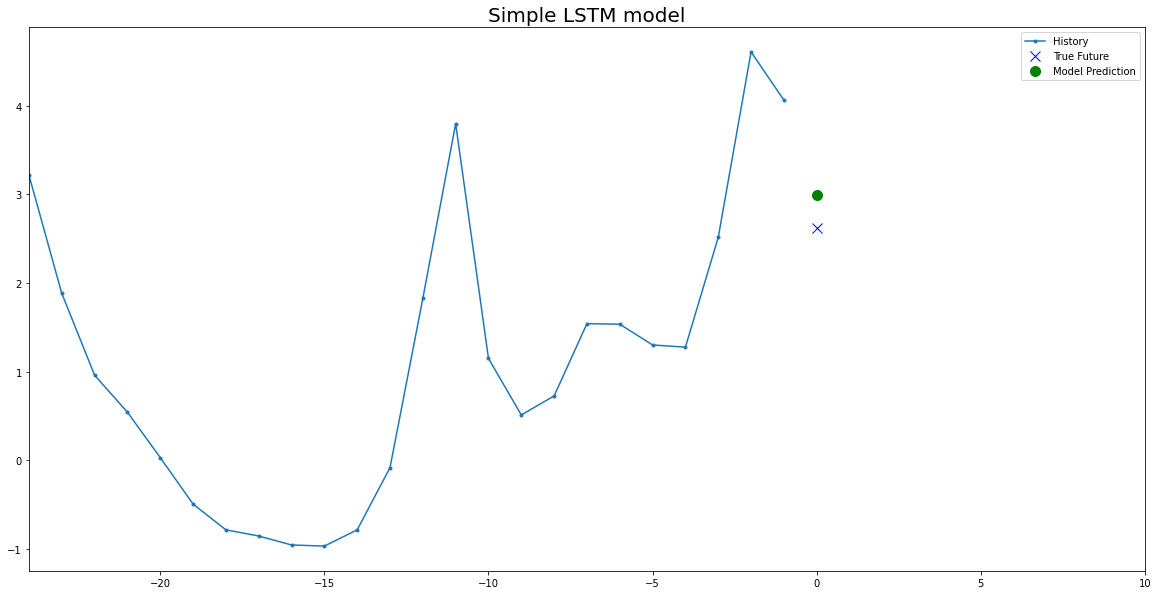

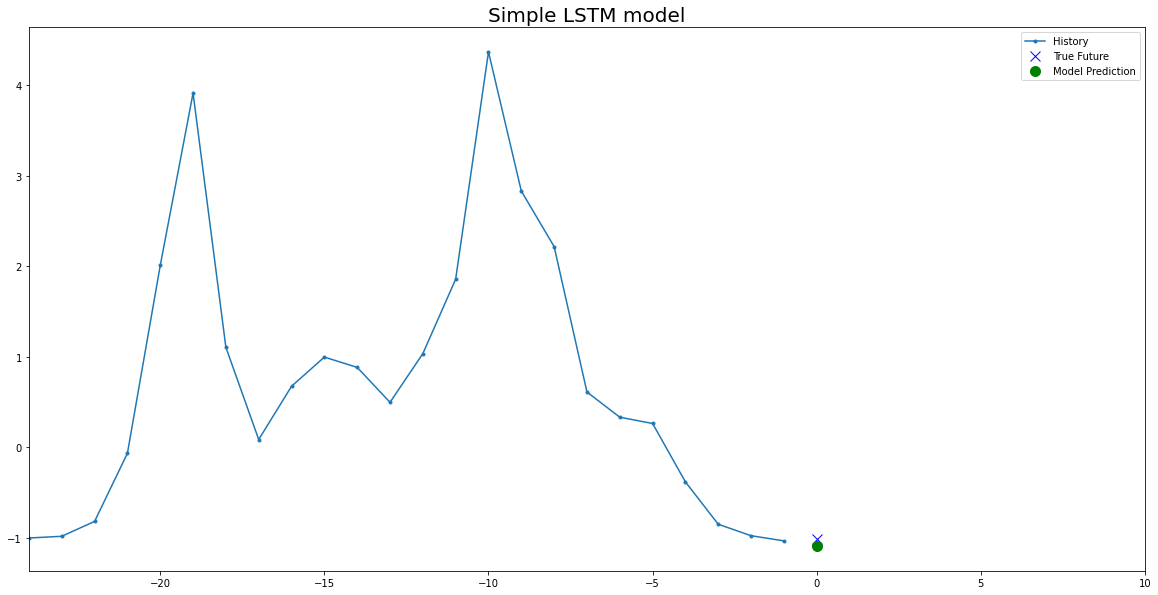

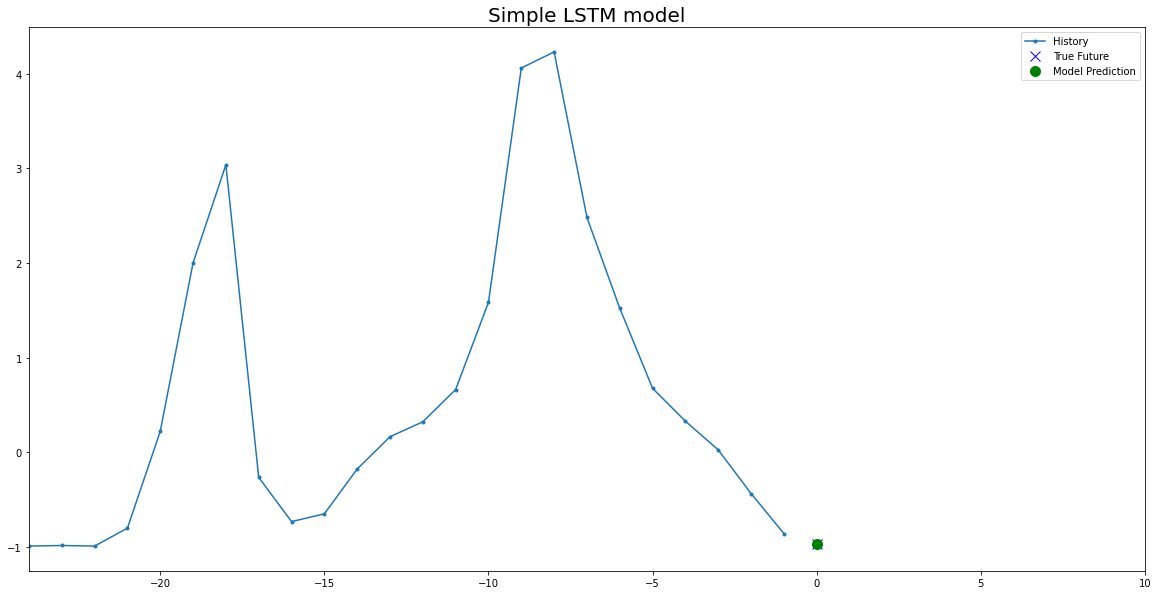

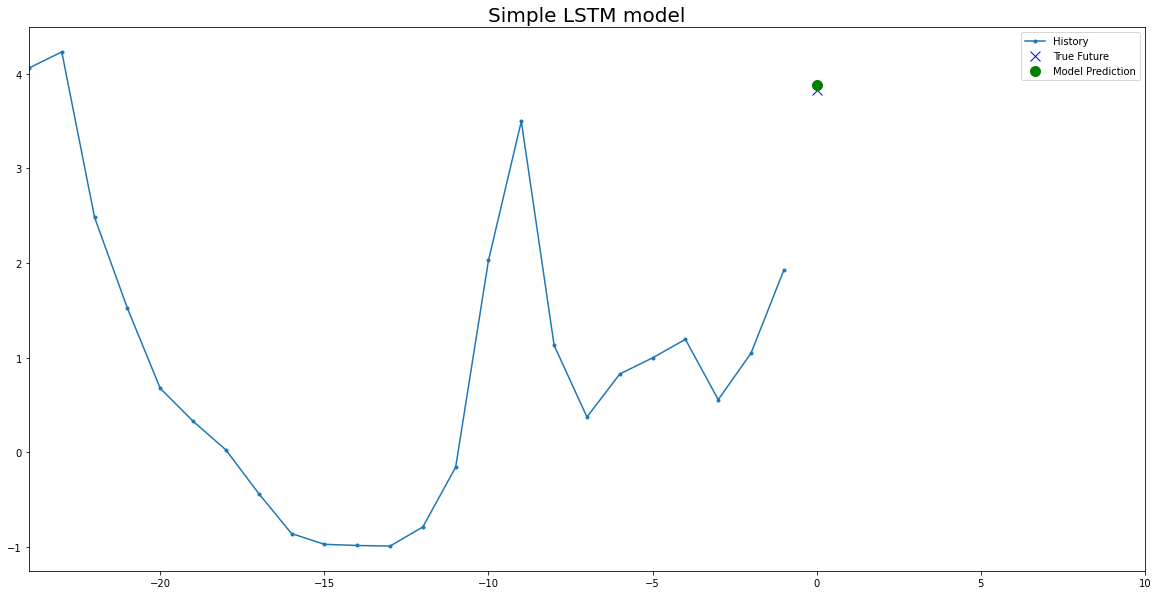

In [265]:
for x, y in val_univariate.take(5):
    plot = show_plot([x[0].numpy(), y[0].numpy(), simple_lstm_model.predict(x)[0]], 0, 
                    'Simple LSTM model')

In [266]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,hour,Temperature_converted,Temperature_segments,dteday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0,396.1912,10.0,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,363.2436,10.0,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2,363.2436,10.0,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3,396.1912,10.0,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4,396.1912,10.0,2011-01-01


Added more features to be considered for preditcion

In [267]:
features_considered = ['season', 'holiday', 'workingday', 'windspeed', 'temp']
features = df[features_considered]
features.index = df['dteday']
features.head()

,season,holiday,workingday,windspeed,temp
dteday,,,,,
2011-01-01,1,0,0,0.0,9.84
2011-01-01,1,0,0,0.0,9.02
2011-01-01,1,0,0,0.0,9.02
2011-01-01,1,0,0,0.0,9.84
2011-01-01,1,0,0,0.0,9.84


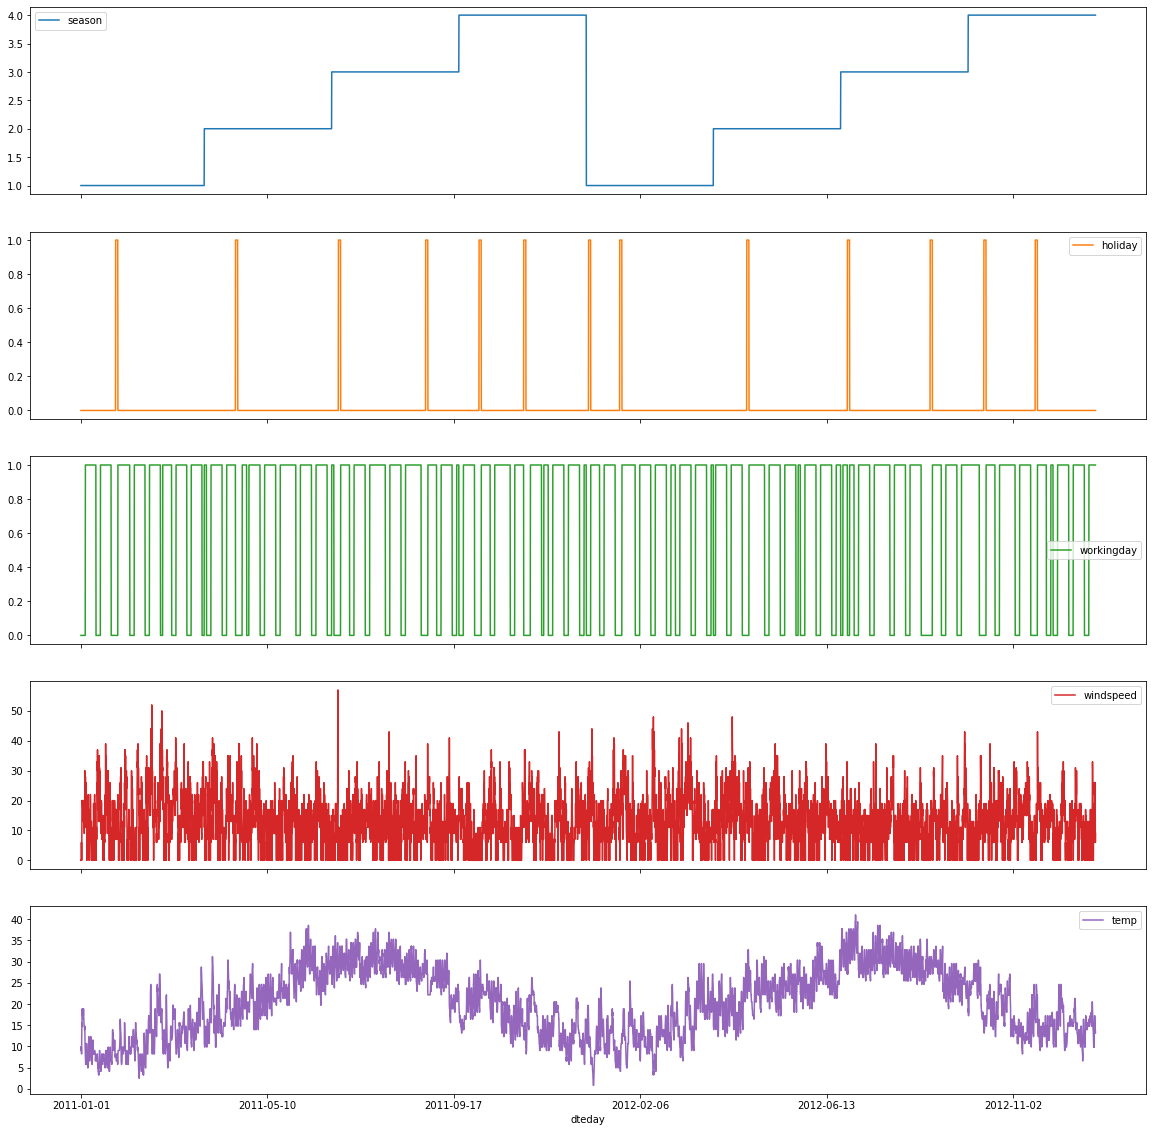

In [268]:
features.plot(subplots = True, figsize = (20, 20))
plt.show()

In [269]:
dataset = features.values
data_mean = dataset[: TRAIN_SPLIT].mean(axis = 0)
data_std = dataset[: TRAIN_SPLIT].std(axis = 0)

dataset = (dataset - data_mean) / data_std

In [270]:
dataset

array([[-1.09309165, -0.16618427, -1.46699975, -1.56857384, -1.22313309],
       [-1.09309165, -0.16618427, -1.46699975, -1.56857384, -1.3305456 ],
       [-1.09309165, -0.16618427, -1.46699975, -1.56857384, -1.3305456 ],
       ...,
       [ 1.69392626, -0.16618427,  0.68166338,  0.20971599, -0.68607055],
       [ 1.69392626, -0.16618427,  0.68166338, -0.85694022, -0.68607055],
       [ 1.69392626, -0.16618427,  0.68166338, -0.50191764, -0.79348305]])

In [272]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step = False):
    data = []
    labels = []
    
    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size
     

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i: i + target_size])
    return np.array(data), np.array(labels)

In [273]:
past_history = 24
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0, TRAIN_SPLIT, past_history,
                                                  future_target, STEP, single_step = True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1], TRAIN_SPLIT, None, past_history,
                                              future_target, STEP, single_step = True)

print(x_train_single.shape)
print(y_train_single.shape)

(7976, 24, 5)
(7976,)


In [274]:
len([x_train_single, y_train_single])

2

In [275]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

print(train_data_single)
print(val_data_single)

<RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [276]:
single_step_model = tf.keras.models.Sequential()

single_step_model.add(tf.keras.layers.LSTM(60, 
                                          input_shape = x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = 'mae')
single_step_history = single_step_model.fit(train_data_single, epochs = EPOCHS, steps_per_epoch = STEPS_PER_EPOCH,
                                           validation_data = val_data_single,
                                           validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 8s 30ms/step - loss: 0.0811 - val_loss: 0.0531
Epoch 2/10
200/200 [==============================] - 5s 27ms/step - loss: 0.0352 - val_loss: 0.0403
Epoch 3/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0286 - val_loss: 0.0313
Epoch 4/10
200/200 [==============================] - 5s 27ms/step - loss: 0.0267 - val_loss: 0.0337
Epoch 5/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0250 - val_loss: 0.0290
Epoch 6/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0245 - val_loss: 0.0308
Epoch 7/10
200/200 [==============================] - 6s 28ms/step - loss: 0.0231 - val_loss: 0.0255
Epoch 8/10
200/200 [==============================] - 6s 28ms/step - loss: 0.0224 - val_loss: 0.0290
Epoch 9/10
200/200 [==============================] - 6s 28ms/step - loss: 0.0216 - val_loss: 0.0276
Epoch 10/10
200/200 [==============================] - 6s 29ms/step - loss: 0.0218 - val_lo

In [277]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title(title, fontsize = 15)
    plt.legend()
    plt.grid()
    
    plt.show()

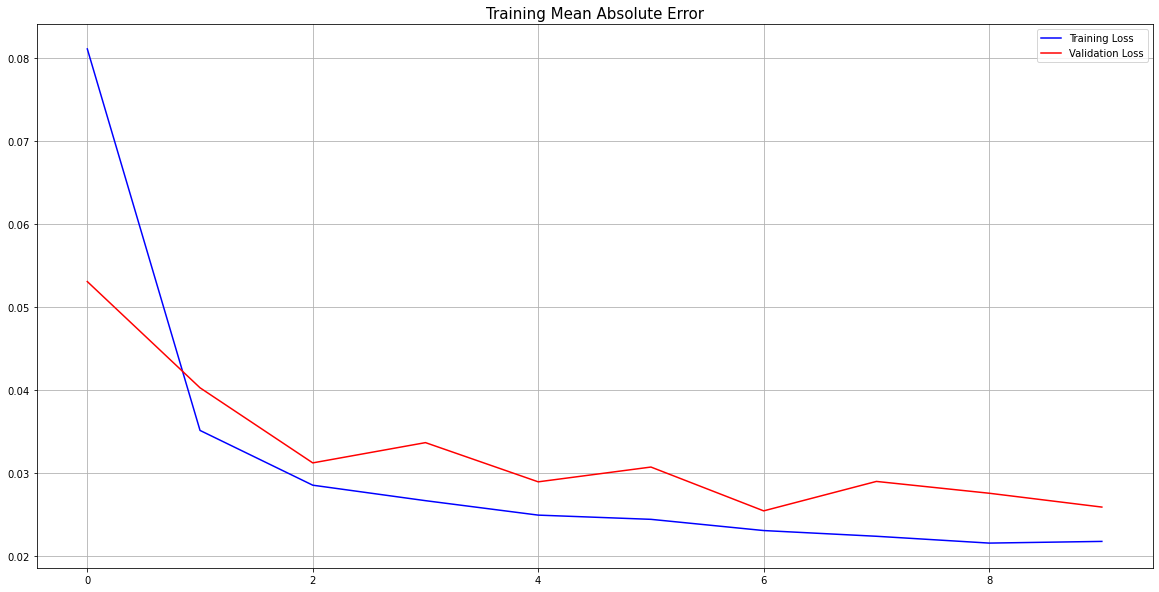

In [278]:
plot_train_history(single_step_history, 'Training Mean Absolute Error')

In [279]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'bx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    
    if delta: 
        future = delta
    else:
        future = 0
        
    plt.figure(figsize = (20, 10))    
    plt.title(title, fontsize = 20)

    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize = 10, label = labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])


In [280]:
df.drop(['dteday','datetime'], axis = 1, inplace = True)